In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_excel('https://github.com/guillelezama/eda_course/raw/main/data/raw/titanic3.xls')

* Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival Survival (0 = No; 1 = Yes)
* name Name
* sex Sex
* age Age
* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard
* ticket Ticket Number
* fare Passenger Fare (British pound)
* cabin Cabin
* embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat Lifeboat
* body Body Identification Number
* home.dest Home/Destination

# Engels dijo: all past history was the history of class struggles, y Leonardo Di Caprio lo demostró.

Analicemos si la clase en la que viajaban los pasajeros del titanic influenció su sobrevivencia.

In [ ]:
# Verificar la forma del dataset
print("\nForma del dataset:")
print(df.shape)


Forma del dataset:
(1309, 14)


In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


Hay missings!

In [ ]:
# Inspeccionar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest

In [ ]:
# Inspeccionar las primeras filas del dataset
print("Ultimas filas del dataset:")
print(df.tail())

Ultimas filas del dataset:
      pclass  survived                       name     sex   age  sibsp  parch  \
1304       3         0       Zabour, Miss. Hileni  female  14.5      1      0   
1305       3         0      Zabour, Miss. Thamine  female   NaN      1      0   
1306       3         0  Zakarian, Mr. Mapriededer    male  26.5      0      0   
1307       3         0        Zakarian, Mr. Ortin    male  27.0      0      0   
1308       3         0         Zimmerman, Mr. Leo    male  29.0      0      0   

      ticket     fare cabin embarked boat   body home.dest  
1304    2665  14.4542   NaN        C  NaN  328.0       NaN  
1305    2665  14.4542   NaN        C  NaN    NaN       NaN  
1306    2656   7.2250   NaN        C  NaN  304.0       NaN  
1307    2670   7.2250   NaN        C  NaN    NaN       NaN  
1308  315082   7.8750   NaN        S  NaN    NaN       NaN  


In [ ]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


Hacer algún análisis de Missing Values

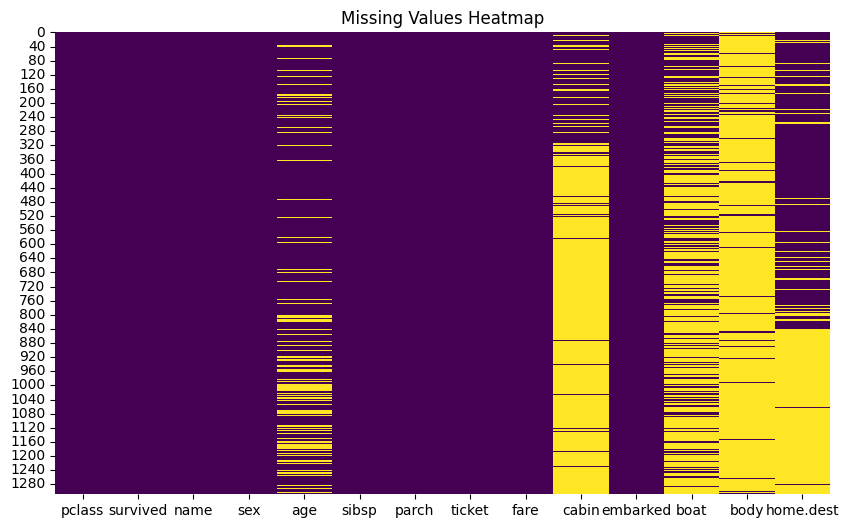

In [ ]:
# Visualicemos los missing values. Si estuvieran todos juntos, o igual de espaciados, podría haber algún problema
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

* Cabin y Home.dest parecen problemáticas por la distribución. Qué significa esa distribución?
* Muchos missing values en boat. Será que es missing para los no sobrevivientes?
* Muchos missing values en body. Será que es missing para los sobrevivientes?

Primero, miremos si son muy diferentes por edad.
---




Comparando la distribución de Edad por clase:


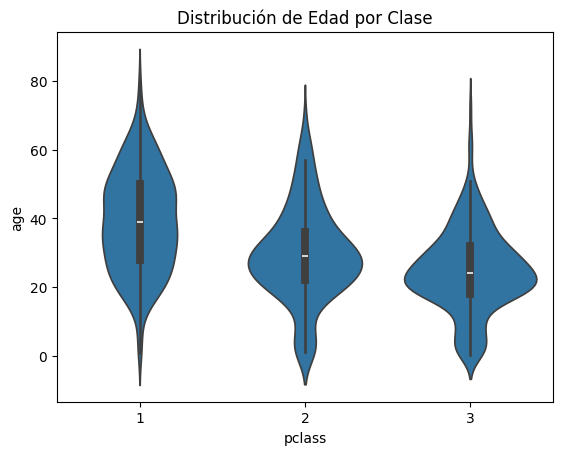

In [ ]:
# Comparar la distribución de la edad por clase
print("\nComparando la distribución de Edad por clase:")
sns.violinplot(x='pclass', y='age', data=df)
plt.title('Distribución de Edad por Clase')
plt.show()

* Las distribuciones de edad por clase son distintas.
* A peor clase, más jóvenes.
* En 2da y 3era, hay mucha concentración alrededor de los 30's.


Comparando la Tarifa Media Pagada por Clase:


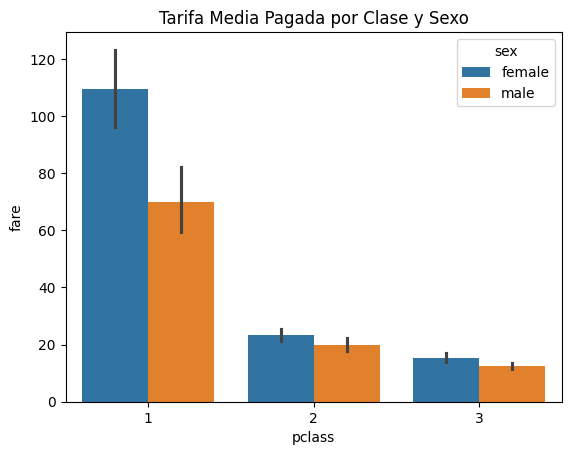

In [ ]:
# Comparar la tarifa media pagada por clase
print("\nComparando la Tarifa Media Pagada por Clase:")
sns.barplot(x='pclass', y='fare', hue='sex', data=df)
plt.title('Tarifa Media Pagada por Clase y Sexo')
plt.show()

Dado que la tarifa representa bien la clase, miremos correlaciones entre edad y tarifa.

In [ ]:
# Correlación de Pearson entre edad y tarifa pagada
pearson_corr = df['age'].corr(df['fare'], method='pearson')
print(f"Correlación de Pearson entre Edad y Tarifa: {pearson_corr}")

Correlación de Pearson entre Edad y Tarifa: 0.17873932314646118


In [ ]:
# Correlación de Spearman entre edad y tarifa pagada
spearman_corr = df['age'].corr(df['fare'], method='spearman')
print(f"Correlación de Spearman entre Edad y Tarifa: {spearman_corr}")

Correlación de Spearman entre Edad y Tarifa: 0.19267576103868872


Aunque existe una tendencia lineal donde, en general, a mayor edad podría asociarse con una tarifa más alta, la relación es débil, lo que significa que la edad no es un buen predictor de la tarifa pagada.

Spearman sugiere que hay una relación monotónica positiva débil, donde a medida que la edad aumenta, tiende a aumentar la tarifa pagada, pero esta relación no necesariamente es lineal. Dado que Spearman es más robusto frente a outliers y no requiere linealidad, este resultado puede reflejar que la relación entre edad y tarifa es más compleja y no estrictamente lineal.

In [ ]:
# Computar medias entre edad para los sobrevivientes
survived = df[df['survived'] == 1]['age'].dropna()
not_survived = df[df['survived'] == 0]['age'].dropna()

print(np.mean(survived),np.mean(not_survived))

28.918228103044495 30.54536882067851


Es una diferencia significativa?

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# t-test: Comparar la edad entre pasajeros que sobrevivieron y los que no
t_stat, p_val = ttest_ind(survived, not_survived)
print(f"t-test para Edad y Supervivencia: t-stat={t_stat}, p-value={p_val}")

t-test para Edad y Supervivencia: t-stat=-1.7964345385118163, p-value=0.07271443942634347


No se puede rechazar la hipótesis nula al nivel de significancia del 5%. Esto significa que no hay evidencia suficiente para afirmar que existe una diferencia significativa en la edad promedio entre los pasajeros que sobrevivieron y los que no.

In [ ]:
#Computar medias de sobrevivencia por clase.
print(df[['survived','pclass']].groupby('pclass').mean()['survived'])

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


In [ ]:
Los niños primero?

Object `primero` not found.


In [ ]:
# Definir grupos etarios: Niños (menores de 18), Adultos Jóvenes (18-35), Adultos (36-60), y Mayores (más de 60)
df['age_group'] = pd.cut(df['age'], bins=[0, 13, 18, 35, 60, 100], labels=['Niños', 'Jóvenes', 'Jóvenes_adultos', 'Adultos', 'Mayores'])

# Computar tasas de supervivencia por grupo etario
survival_rates_by_age_group = df[['survived', 'age_group']].groupby('age_group').mean()['survived']

# Mostrar las tasas de supervivencia por grupo etario
print("Tasas de Supervivencia por Grupo Etario:")
print(survival_rates_by_age_group)

Tasas de Supervivencia por Grupo Etario:
age_group
Niños              0.575758
Jóvenes            0.404255
Jóvenes_adultos    0.386064
Adultos            0.411765
Mayores            0.242424
Name: survived, dtype: float64


<ipython-input-17-bcdfd5f9542c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_by_age_group = df[['survived', 'age_group']].groupby('age_group').mean()['survived']


In [ ]:
Las mujeres primero?

Object `primero` not found.


In [ ]:
print(df[['survived', 'sex']].groupby('sex').mean()['survived'])

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


In [ ]:
pd.crosstab(df['pclass'], df['survived'])

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


In [ ]:
# Frecuencias observadas de supervivencia
# Clase 1
print(200/(200+123))
# Clase 2
print(119/(158+119))
# Clase 3
print(181/(528+181))

0.6191950464396285
0.4296028880866426
0.2552891396332863


In [ ]:
# Chi-cuadrado: Comparemos la supervivencia por clase mirando si son significativas.
contingency_table = pd.crosstab(df['pclass'], df['survived'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Prueba de Chi-cuadrado para Clase y Supervivencia: chi2={chi2}, p-value={p}")

Prueba de Chi-cuadrado para Clase y Supervivencia: chi2=127.85915643930326, p-value=1.7208259588256175e-28


La probabilidad de supervivencia está relacionada con la edad, con el género y con la clase.

Computar las edades de supervivencia para los pasajeros del titanic por clase. Son diferentes?

In [ ]:
# Miremos primero la probabilidad de supervivencia por grupo etario
print(df[['survived', 'age_group', 'pclass']].groupby(['age_group', 'pclass']).mean()['survived'])

age_group        pclass
Niños            1         0.833333
                 2         1.000000
                 3         0.397059
Jóvenes          1         0.866667
                 2         0.352941
                 3         0.306452
Jóvenes_adultos  1         0.731959
                 2         0.421769
                 3         0.250871
Adultos          1         0.593103
                 2         0.318182
                 3         0.153846
Mayores          1         0.285714
                 2         0.166667
                 3         0.166667
Name: survived, dtype: float64


<ipython-input-26-c7051ef9ae8d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df[['survived', 'age_group', 'pclass']].groupby(['age_group', 'pclass']).mean()['survived'])


* En cualquier grupo etaria la probabilidad de 1era clase es mayor.
* Siempre en 2da es mayor que en 3era.

Aún cuando fijamos la edad, la clase es re importante.

In [ ]:
print(df[['survived', 'age_group', 'pclass', 'sex']].groupby(['age_group', 'pclass', 'sex' ]).count()['survived'])


age_group        pclass  sex   
Niños            1       female      1
                         male        5
                 2       female     14
                         male       11
                 3       female     31
                         male       37
Jóvenes          1       female     12
                         male        3
                 2       female      7
                         male       10
                 3       female     27
                         male       35
Jóvenes_adultos  1       female     53
                         male       44
                 2       female     58
                         male       89
                 3       female     71
                         male      216
Adultos          1       female     61
                         male       84
                 2       female     24
                         male       42
                 3       female     22
                         male       56
Mayores          1       female 

<ipython-input-29-944bce206175>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df[['survived', 'age_group', 'pclass', 'sex']].groupby(['age_group', 'pclass', 'sex' ]).count()['survived'])


In [ ]:
# Comparemos la edad promedio de supervivencia por clase
# Filtrar los datos para incluir solo los pasajeros que sobrevivieron
survived = df[df['survived'] == 1]
not_survived = df[df['survived'] == 0]

In [ ]:
print(survived[['pclass', 'age']].groupby('pclass').mean())
print(not_survived[['pclass', 'age']].groupby('pclass').mean())

              age
pclass           
1       36.833794
2       24.858696
3       21.545166
              age
pclass           
1       43.247573
2       33.167808
3       25.974549


Para cada clase, los que sobrevivieron son más jóvenes en promedio que los que no.

In [ ]:
# Aplicar ANOVA para comparar la edad entre las diferentes clases
anova_result = f_oneway(survived[survived['pclass'] == 1]['age'].dropna(),
                        survived[survived['pclass'] == 2]['age'].dropna(),
                        survived[survived['pclass'] == 3]['age'].dropna())

print(f"ANOVA para Edad y Clase entre Supervivientes: F-stat={anova_result.statistic}, p-value={anova_result.pvalue}")


ANOVA para Edad y Clase entre Supervivientes: F-stat=56.57794094318898, p-value=1.6606971545777764e-22


La hipótesis nula es que la edad promedio de los sobrevivientes es igual para cada clase. Esto es rechazado.

En el grafico de violines habiamos visto que las edades de todos los pasajeros ya eran diferentes. Entonces es esperado que en los sobreviviente, o en los que fallecieron las edades sean diferentes.

In [ ]:
# Miremos primero la probabilidad de supervivencia por grupo etario
print(df[['survived', 'sex', 'pclass']].groupby(['sex', 'pclass']).mean()['survived'])

sex     pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.340782
        2         0.146199
        3         0.152130
Name: survived, dtype: float64


Dentro de cada sexo, la clase importa.

In [ ]:
# Miremos primero la probabilidad de supervivencia por grupo etario
df[['survived', 'sex', 'pclass', 'age_group']].groupby(['sex', 'age_group' ,'pclass']).mean()['survived']

<ipython-input-38-a1a0cdd6d827>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['survived', 'sex', 'pclass', 'age_group']].groupby(['sex', 'age_group' ,'pclass']).mean()['survived']


sex     age_group        pclass
female  Niños            1         0.000000
                         2         1.000000
                         3         0.483871
        Jóvenes          1         1.000000
                         2         0.857143
                         3         0.592593
        Jóvenes_adultos  1         0.981132
                         2         0.896552
                         3         0.464789
        Adultos          1         0.967213
                         2         0.833333
                         3         0.318182
        Mayores          1         0.833333
                         2              NaN
                         3         1.000000
male    Niños            1         1.000000
                         2         1.000000
                         3         0.324324
        Jóvenes          1         0.333333
                         2         0.000000
                         3         0.085714
        Jóvenes_adultos  1         0.431818
                         2         0.112360
                         3         0.180556
        Adultos          1         0.321429
                         2         0.023810
                         3         0.089286
        Mayores          1         0.066667
                         2         0.166667
                         3         0.000000
Name: survived, dtype: float64

Extra: Hacer t-tests para el Mall Dataset, comparando income, age y expenditure score entre Male and Females (en vez de entre diferentes clases)